In [1]:
import pandas as pd
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input,Flatten,Embedding,Dropout
from keras.models import Model
import numpy as np

In [2]:
data_df=pd.read_excel("Dataset.xlsx",sheet_name='Sheet1')
print("Column headings:")
data_df

Column headings:


,Date,Date.1,Open,High,Low,Close,Vloume,price change,price limit,volume change,volume limit,amplitude,diffrence,Target,Date.2,Event
0,2007-01-02,2007.01.02,1.31980,1.32950,1.31980,1.32710,4020,0.00720,0.005455,-30,-0.007407,0.007349,0.005531,1.0,2007-01-02,Commodity Prices y/y Bank Holiday Spanish Manu...
1,2007-01-03,2007.01.03,1.32700,1.32880,1.31450,1.31680,4618,-0.01030,-0.007761,598,0.148756,0.010775,-0.007686,0.0,2007-01-03,Spanish Unemployment Change Manufacturing PMI ...
2,2007-01-04,2007.01.04,1.31670,1.31770,1.30740,1.30820,4367,-0.00860,-0.006531,-251,-0.054353,0.007822,-0.006455,0.0,2007-01-04,CPI m/m Spanish Services PMI Italian Services ...
3,2007-01-05,2007.01.05,1.30840,1.31030,1.29800,1.30070,5240,-0.00750,-0.005733,873,0.199908,0.009402,-0.005886,0.0,2007-01-05,FOMC Member Kohn Speaks
4,2007-01-08,2007.01.08,1.30060,1.30340,1.29710,1.30210,3831,0.00140,0.001076,-1409,-0.268893,0.004844,0.001153,1.0,2007-01-08,Unemployment Rate German Retail Sales m/m Germ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3262,2019-08-05,2019.08.05,1.11017,1.12130,1.11009,1.12029,73359,0.00977,0.008798,-7523,-0.093012,0.010094,0.009113,1.0,2019-08-05,SECO Consumer Climate Retail Sales y/y Spanish...
3263,2019-08-06,2019.08.06,1.12017,1.12491,1.11675,1.12010,371692,-0.00019,-0.000170,298333,4.066754,0.007284,-0.000062,0.0,2019-08-06,Cash Rate RBA Rate Statement Leading Indicator...
3264,2019-08-07,2019.08.07,1.11995,1.12417,1.11793,1.11988,81957,-0.00022,-0.000196,-289735,-0.779503,0.005571,-0.000062,0.0,2019-08-07,German Industrial Production m/m French Trade ...
3265,2019-08-08,2019.08.08,1.11988,1.12328,1.11770,1.11792,61581,-0.00196,-0.001750,-20376,-0.248618,0.004983,-0.001750,0.0,2019-08-08,Economy Watchers Sentiment ECB Economic Bullet...


In [3]:
colnames=['Date','ntiment', 'text']
data_txt=pd.read_excel("text-dataset.xlsx",names=colnames,sheet_name='Sheet1')
print("Column headings:")
data_txt.head()

Column headings:


,Date,ntiment,text
0,2007-01-03,0.0,Spanish Unemployment Change Manufacturing PMI ...
1,2007-01-04,0.0,CPI m/m Spanish Services PMI Italian Services ...
2,2007-01-05,0.0,FOMC Member Kohn Speaks
3,2007-01-08,1.0,Unemployment Rate German Retail Sales m/m Germ...
4,2007-01-09,0.0,German Trade Balance German Industrial Product...


In [4]:
data_txt['text'][0]

'Spanish Unemployment Change Manufacturing PMI German Unemployment Change M3 Money Supply y/y Private Loans y/y BOE Credit Conditions Survey Construction PMI French 10-y Bond Auction Challenger Job Cuts y/y ADP Non-Farm Employment Change Unemployment Claims Factory Orders m/m Crude Oil Inventories Total Vehicle Sales AIG Services Index '

In [5]:
new=pd.merge(data_df, data_txt, on='Date', how='inner')

In [6]:
new.head()

,Date,Date.1,Open,High,Low,Close,Vloume,price change,price limit,volume change,volume limit,amplitude,diffrence,Target,Date.2,Event,ntiment,text
0,2007-01-03,2007.01.03,1.3270,1.3288,1.3145,1.3168,4618,-0.0103,-0.007761,598,0.148756,0.010775,-0.007686,0.0,2007-01-03,Spanish Unemployment Change Manufacturing PMI ...,0.0,Spanish Unemployment Change Manufacturing PMI ...
1,2007-01-04,2007.01.04,1.3167,1.3177,1.3074,1.3082,4367,-0.0086,-0.006531,-251,-0.054353,0.007822,-0.006455,0.0,2007-01-04,CPI m/m Spanish Services PMI Italian Services ...,0.0,CPI m/m Spanish Services PMI Italian Services ...
2,2007-01-05,2007.01.05,1.3084,1.3103,1.2980,1.3007,5240,-0.0075,-0.005733,873,0.199908,0.009402,-0.005886,0.0,2007-01-05,FOMC Member Kohn Speaks,0.0,FOMC Member Kohn Speaks
3,2007-01-08,2007.01.08,1.3006,1.3034,1.2971,1.3021,3831,0.0014,0.001076,-1409,-0.268893,0.004844,0.001153,1.0,2007-01-08,Unemployment Rate German Retail Sales m/m Germ...,1.0,Unemployment Rate German Retail Sales m/m Germ...
4,2007-01-09,2007.01.09,1.3019,1.3051,1.2983,1.2998,4352,-0.0023,-0.001766,521,0.135996,0.005222,-0.001613,0.0,2007-01-09,German Trade Balance German Industrial Product...,0.0,German Trade Balance German Industrial Product...


In [7]:
train_text = new['Event']
WORD_NUM = 5000 #arbitrary choice, but commonly used vocab size when using word embeddings
tokenizer = Tokenizer(num_words = WORD_NUM,
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'',
                      lower = True)
tokenizer.fit_on_texts(train_text)
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
dict(list(word_index.items())[:10])


{'m': 1,
 'y': 2,
 'q': 3,
 'pmi': 4,
 'speaks': 5,
 'manufacturing': 6,
 'sales': 7,
 'index': 8,
 'german': 9,
 'cpi': 10}

In [8]:
train_seq = tokenizer.texts_to_sequences(train_text)
print(train_seq[1])

[10, 1, 1, 49, 19, 4, 31, 19, 4, 13, 19, 4, 19, 4, 147, 128, 120, 99, 189, 190, 1, 1, 10, 23, 94, 2, 2, 31, 24, 10, 1, 1, 191, 1, 1, 192, 1, 1, 70, 114, 48, 35, 12, 11, 95, 193, 96, 1, 1, 194, 4, 90, 70, 6, 4, 65, 66, 67, 21, 15, 346, 5]


In [9]:
len (train_seq[100])

30

In [68]:
p=[len(s) for s in train_seq]
max(p)
MAX_SEQUENCE_LENGTH = np.mean(p).astype(int) #abritrary choice
MAX_SEQUENCE_LENGTH

59

In [69]:
train_pad = pad_sequences(train_seq, maxlen= MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
print(train_pad.shape)

(3266, 59)


In [12]:
new['ntiment']= new['ntiment'].fillna (0)

In [13]:
probs = np.random.rand(len(new))
training_mask = probs < 0.8
test_mask = (probs>=0.80) 
y_train=new['ntiment'][training_mask]
y_test =new['ntiment'][test_mask]

x_train_s=train_pad[training_mask]
x_test_s=train_pad[test_mask]

x_train_n=new.iloc[:,2:13][training_mask]
x_test_n =new.iloc[:,2:13][test_mask]

In [26]:
input1= Input (shape= (60,))
input2 = Input (shape=(11,))

In [27]:
x= tf.keras.layers.Embedding (vocab_size, 30, input_length=60)(input1)
x= tf.keras.layers.Conv1D (30,5)(x)
x= tf.keras.layers.GlobalAvgPool1D()(x)
x= tf.keras.layers.Concatenate()([x,input2])
x= tf.keras.layers.Dense (16,activation='relu')(x)
x= tf.keras.layers.Dense (1,activation='sigmoid')(x)
model= tf.keras.Model (inputs=[input1,input2], outputs=x)

In [28]:
#x= tf.keras.layers.Embedding (vocab_size, 20, input_length=60)(input1)
#x= tf.keras.layers.Flatten()(x)
#x= tf.keras.layers.Dense(64)(x)
#x= tf.keras.layers.Concatenate()([x,input2])
#x= tf.keras.layers.Dense (16,activation='relu')(x)
#x= tf.keras.layers.Dense (1,activation='sigmoid')(x)
#model= tf.keras.Model (inputs=[input1,input2], outputs=x)

In [29]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 60)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 60, 30)       15000       input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 56, 30)       4530        embedding_1[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_1 (Glo (None, 30)           0           conv1d_1[0][0]                   
____________________________________________________________________________________________

In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
history=model.fit([x_train_s,x_train_n], y_train,epochs=20,batch_size=20
               ,validation_data=([x_test_s,x_test_n ],y_test))

Epoch 1/20
130/130 [==============================] - 1s 5ms/step - loss: 1114.5743 - accuracy: 0.4902 - val_loss: 74.5863 - val_accuracy: 0.4904
Epoch 2/20
130/130 [==============================] - 1s 4ms/step - loss: 68.4605 - accuracy: 0.4839 - val_loss: 33.6758 - val_accuracy: 0.4831
Epoch 3/20
130/130 [==============================] - 1s 5ms/step - loss: 51.7062 - accuracy: 0.4802 - val_loss: 78.3436 - val_accuracy: 0.5140
Epoch 4/20
130/130 [==============================] - 1s 4ms/step - loss: 72.6917 - accuracy: 0.5286 - val_loss: 26.4886 - val_accuracy: 0.5096
Epoch 5/20
130/130 [==============================] - 1s 5ms/step - loss: 41.9585 - accuracy: 0.4905 - val_loss: 16.4027 - val_accuracy: 0.4963
Epoch 6/20
130/130 [==============================] - 1s 4ms/step - loss: 29.7783 - accuracy: 0.5121 - val_loss: 38.2859 - val_accuracy: 0.5066
Epoch 7/20
130/130 [==============================] - 0s 3ms/step - loss: 25.7728 - accuracy: 0.5076 - val_loss: 15.6526 - val_accurac

In [32]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [33]:
from tensorflow.keras.utils import plot_model
import pydot

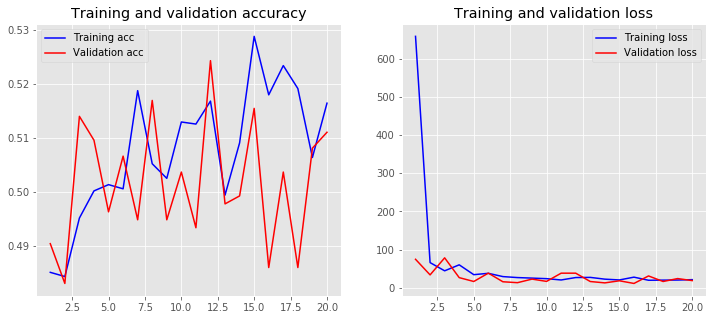

In [34]:
plot_history(history)

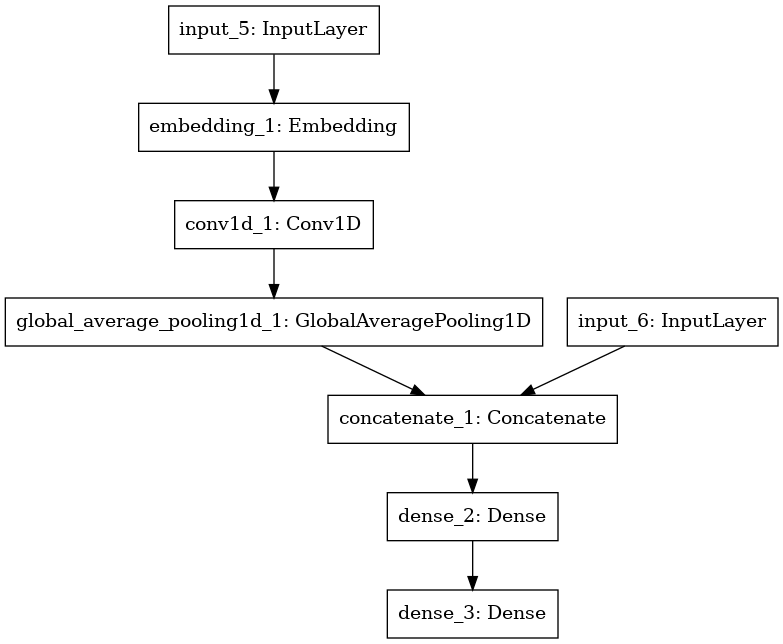

In [35]:
plot_model(model)

In [36]:
dot_img_file = '/tmp/model_1.png'

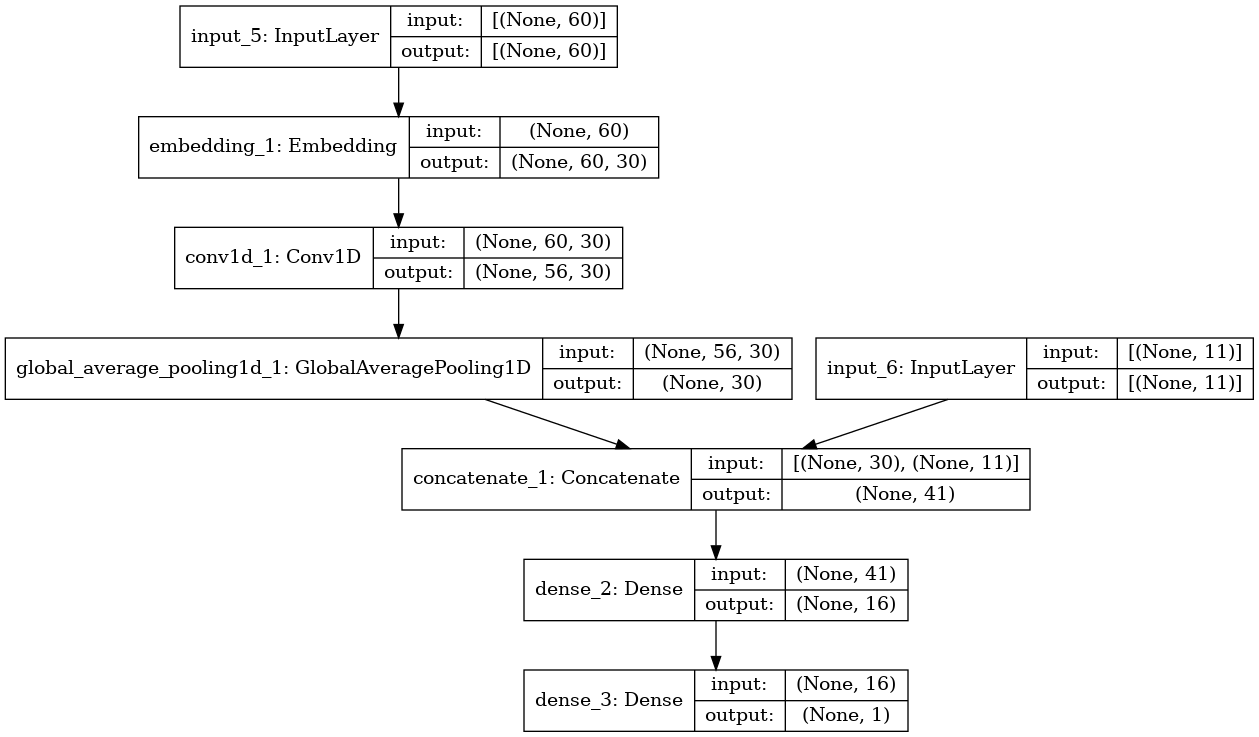

In [37]:
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)